# Silhouette Score Evaluation

This notebook demonstrates how to use the silhouette score to evaluate the clustering performance of KMeans and Agglomerative Clustering.

## Import Required Libraries

Import the necessary libraries including matplotlib, numpy, scikit-learn clustering algorithms, and evaluation metrics.

In [6]:
# Import the required libraries.
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

## Define Plot Colors and Generate Sample Data

Define custom colors for the visualizations and generate synthetic blob data for clustering.

In [7]:
# Define the colors to be used in the plot.
colors = [
    "#2580B7", # Blue
    "#F59B11", # Yellow
    "#44546A", # Gray
]

# Set the seed for reproducibility.
np.random.seed(42)

# Generate sample data.
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

## Apply Clustering Algorithms

Apply both K-Means and Agglomerative Clustering with 2 clusters.

In [8]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo.fit_predict(X)

## Calculate Silhouette Scores

Evaluate the clustering quality using the Silhouette Score metric.

In [9]:
# Calculate Silhouette Scores
kmeans_silhouette = silhouette_score(X, kmeans_labels)
agglo_silhouette = silhouette_score(X, agglo_labels)

print(f"KMeans Silhouette Score: {kmeans_silhouette}")
print(f"Agglomerative Clustering Silhouette Score: {agglo_silhouette}")

KMeans Silhouette Score: 0.4546802473065816
Agglomerative Clustering Silhouette Score: 0.54731479631826


## Visualize Clustering Results

Plot the clustering results for both algorithms with their silhouette scores.

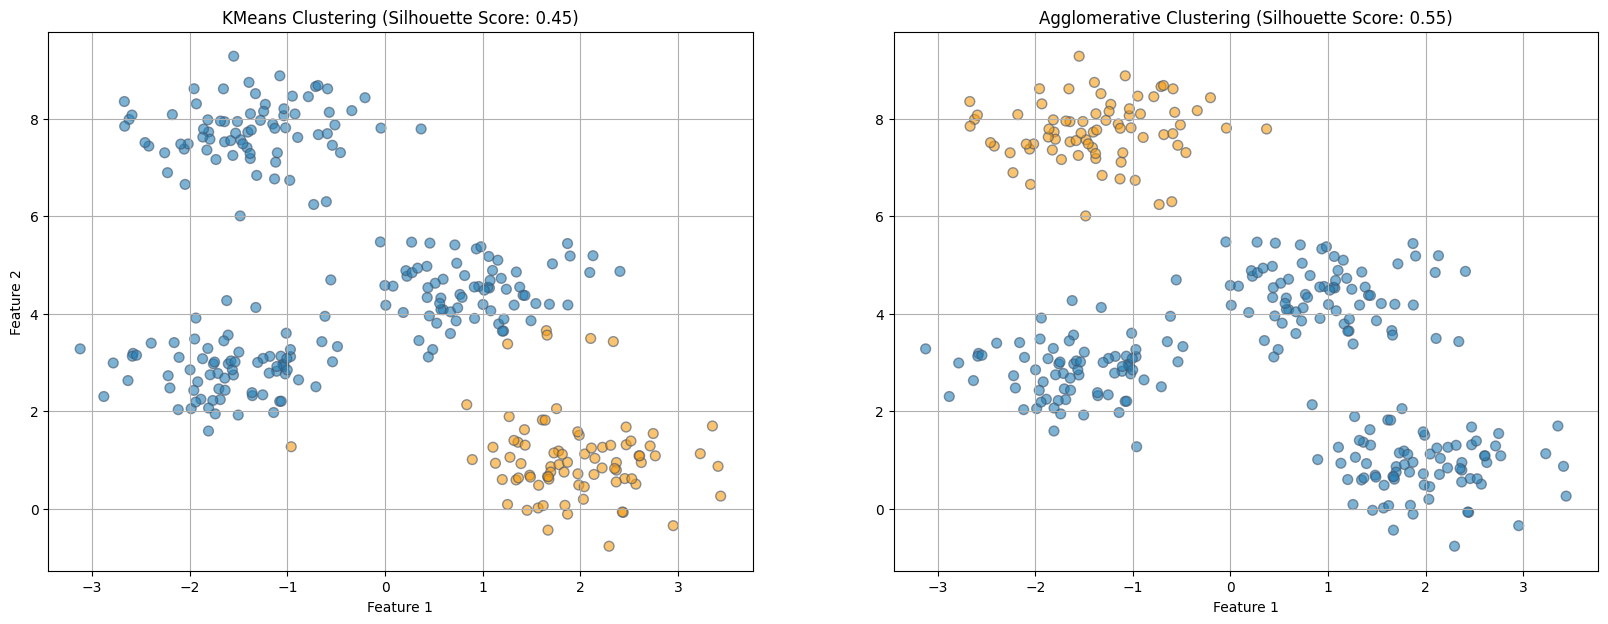

In [10]:
# Plotting the clusters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

ax1.scatter(
    X[:, 0], X[:, 1], c=[colors[int(label)] for label in kmeans_labels],
    s=50, edgecolor=colors[-1], alpha=0.6
)
ax1.set_title(
    f"KMeans Clustering (Silhouette Score: {kmeans_silhouette:.2f})")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")
ax1.grid(True)

ax2.scatter(
    X[:, 0], X[:, 1], c=[colors[int(label)] for label in agglo_labels],
    s=50, edgecolor=colors[-1], alpha=0.6
)
ax2.set_title(
    f"Agglomerative Clustering (Silhouette Score: {agglo_silhouette:.2f})")
ax2.set_xlabel("Feature 1")
ax2.grid(True)

plt.show()